# MetaVoxels Tutorial

In [6]:
# Amira Abdel-Rahman
# (c) Massachusetts Institute of Technology 2020

# tested using julia 1.5.2 and windows Nvidia geforce gtx 1070 Ti

### Import Libraries

In [7]:
GPU=false # if you want to use the gpu or not
plotting=false # if going to plot graphs
logging=true # if you want the simulation to be verbose
include("../julia/MetaVoxels.jl") #load MetaVoxels!

Loaded MetaVoxels Functions!


## 1. Voxel Design

### 1.a. Option 1: Import lines from Rhino (.3dm)

In [3]:
rhino=true

setup = Dict()

setup["rhino"]=rhino
setup["rhinoFileName"]="../julia/examples/trial.3dm";
setup["layerIndex"]="1"; #layer index to import, only lines from these layer will get imported
setup["voxelList"]=false

# make sure to divide curves into smaller lines, it will only add nodes at the start and end of each line/curve

voxelSize=75 #in case you want to array the base rhino curve, what is the size of the voxel
latticeSizeX=2 # if you don't want to copy/array make this 1
latticeSizeY=2 # if you don't want to copy/array make this 1
latticeSizeZ=2 # if you don't want to copy/array make this 1

setup["latticeSizeX"]=latticeSizeX
setup["latticeSizeY"]=latticeSizeY
setup["latticeSizeZ"]=latticeSizeZ

gridSize=10 #lattice size
setup["gridSize"]=gridSize

#scaling params
setup["voxelSize"]=voxelSize; #voxel size
setup["scale"]=1e4; #scale for visualization
setup["hierarchical"]=false; #hierachical simualtion


### 1.b Option 2: Draw Cuboct/Hierachical Lattice

In [6]:
rhino=false

voxelSize=0.001
latticeSizeX=7
latticeSizeY=2
latticeSizeZ=2

gridSize=10

setup = Dict()
setup["gridSize"]=gridSize

setup["rhino"]=false
setup["voxelList"]=false


setup["latticeSizeX"]=latticeSizeX
setup["latticeSizeY"]=latticeSizeY
setup["latticeSizeZ"]=latticeSizeZ

#scaling params
setup["voxelSize"]=voxelSize; #voxel size
setup["scale"]=1e4; #scale for visualization
setup["hierarchical"]=true; #hierachical simualtion 
# if setup["hierarchical"] is true it will assume each voxel is one node, 
# else it will assume each voxel is a detailed cuboct

### 1.c. Option 3: Draw from voxel list

In [8]:
voxelSize=0.001
latticeSizeX=1
latticeSizeY=1
latticeSizeZ=1

gridSize=10

setup["rhino"]=false;
setup["useVoxelList"]=true;

#//allowed x, yand z are from -gridSize to +gridSize (floor is at 0)
setup["voxelList"]=[
        [[0,3,0],material1],# will explain materials next section
        [[0,3,1],material1],# 
        [[0,3,2],material1],# 
        [[0,3,3],material1],# 
        [[0,3,4],material1],# 
]

false

### 1.d. Option 4: Fill mesh with voxels (wip)

In [7]:
# rhino=false
# rhinoFileName= "./trial.stl"
# voxelSize=5.0

## 2. Boundary Conditions

### 2.a. Global Settings

In [9]:
#simulation params
setup["numTimeSteps"]=5000; #num of saved timesteps for simulation

setup["poisson"]=false; # account for poisson ration (only for hierarchical)
setup["linear"]=true; # linear vs non-linear
setup["thermal"]=true; #if there is change in temperature
setup["globalDamping"]=0.15; # (usually from 0.1 to 0.4)


#visualization params
setup["maxNumFiles"]=200; #num of saved timesteps for visualization, make sure it's bigger than numTimeSteps


### 2.b. Materials

In [10]:
#default material
material1= Dict()
material1["area"]=voxelSize*voxelSize
material1["density"]=1e3
material1["stiffness"]=1e6
material1["poissonRatio"]=0.0
material1["cTE"]=0.0 #coefficient of thermal expansion

#large bounding box for default material
boundingBoxMaterial1=Dict()
boundingBoxMaterial1["min"]=Dict()
boundingBoxMaterial1["max"]=Dict()

boundingBoxMaterial1["min"]["x"]=-voxelSize*gridSize;
boundingBoxMaterial1["min"]["y"]=-voxelSize*gridSize;
boundingBoxMaterial1["min"]["z"]=-voxelSize*gridSize;

boundingBoxMaterial1["max"]["x"]= voxelSize*gridSize;
boundingBoxMaterial1["max"]["y"]= voxelSize*gridSize;
boundingBoxMaterial1["max"]["z"]= voxelSize*gridSize;

In [11]:
#second material
material2= Dict()
material2["area"]=voxelSize*voxelSize # square cross section
material2["density"]=1e3
material2["stiffness"]=1e6
material2["poissonRatio"]=0.0 # only for hiearchical
material2["cTE"]=0.1 #coefficient of thermal expansion

#bounding box material 2
boundingBoxMaterial2=Dict()
boundingBoxMaterial2["min"]=Dict()
boundingBoxMaterial2["max"]=Dict()


boundingBoxMaterial2["min"]["x"]=0;
boundingBoxMaterial2["min"]["y"]=voxelSize;
boundingBoxMaterial2["min"]["z"]=0;

boundingBoxMaterial2["max"]["x"]= voxelSize*(latticeSizeX);
boundingBoxMaterial2["max"]["y"]= voxelSize*(latticeSizeY);
boundingBoxMaterial2["max"]["z"]= voxelSize*(latticeSizeZ);

In [12]:
setup["materials"]=[
    [boundingBoxMaterial1,material1],
    [boundingBoxMaterial2,material2]
];

### 2.c. Supports

In [13]:
#x,y,z,rx,ry,rz (default is pinned joing i.e [false,false,false,true,true,true])
dof=[true,true,true,true,true,true]

boundingBoxSupport1=Dict()
boundingBoxSupport1["min"]=Dict()
boundingBoxSupport1["max"]=Dict()


boundingBoxSupport1["min"]["x"]= 0;
boundingBoxSupport1["min"]["y"]= 0;
boundingBoxSupport1["min"]["z"]= 0;

boundingBoxSupport1["max"]["x"]= voxelSize;
boundingBoxSupport1["max"]["y"]= voxelSize*(latticeSizeY);
boundingBoxSupport1["max"]["z"]= voxelSize*(latticeSizeZ);

setup["supports"]=[
        [boundingBoxSupport1,dof]
    ];

### 2.d. Loads

#### 2.d.1 Static Loads

In [14]:
load1=Dict()
load1["x"]=0.0
load1["y"]=0.0
load1["z"]=0.0

boundingBoxLoad1=Dict()
boundingBoxLoad1["min"]=Dict()
boundingBoxLoad1["max"]=Dict()

boundingBoxLoad1["min"]["x"]=voxelSize*(latticeSizeX-1);
boundingBoxLoad1["min"]["y"]=0;
boundingBoxLoad1["min"]["z"]=0;

boundingBoxLoad1["max"]["x"]=voxelSize*(latticeSizeX);
boundingBoxLoad1["max"]["y"]=voxelSize*(latticeSizeY);
boundingBoxLoad1["max"]["z"]=voxelSize*(latticeSizeZ);


setup["loads"]=[
        [boundingBoxLoad1,load1]
    ];

#### 2.d.2 Fixed Displacements

In [15]:
setup["fixedDisplacements"]=[];

#### 2.d.3 Dynamic Loads

In [62]:
function floorEnabled()
    return false
end

function gravityEnabled()
    return false
end

function externalDisplacement(currentTimeStep,N_position,N_fixedDisplacement)
    return N_fixedDisplacement
end

function externalForce(currentTimeStep,N_position,N_currentPosition,N_force)
    return N_force #if constant force
#     if currentTimeStep>2500
#         return Vector3(0,0,0)
#     else
#         return N_force
#     end
end

function updateTemperature(currentRestLength,currentTimeStep,mat)
    return currentRestLength # if no temperature
#     if currentTimeStep<1000
#         temp=-5.0*currentTimeStep/1000
#         currentRestLength=0.5*mat.L*(2.0+temp*mat.cTE)
#     elseif currentTimeStep==2500
#         temp=0
#         currentRestLength=0.5*mat.L*(2.0+temp*mat.cTE)
#     end
#     return currentRestLength
end

updateTemperature (generic function with 1 method)

## 3. Export setup to json

In [20]:
simName= "tutorial" # set name for simulation


# get a saved setup from an external julia file
include("../julia/examples/thermalTest.jl") #template for multimaterial hierarchical voxels with different thermal coefficient of thermal expansion 
# include("../julia/examples/poissonTest.jl") #template for hierarchical voxels with global poisson ratio
# include("../julia/examples/latticeTest.jl") #template for hiearcical lattice voxel (small scale)
# include("../julia/examples/latticeTest2.jl") #template for lattice voxel (big scale with real params)
# include("../julia/examples/rhinoTest.jl") #template for importing geometry from rhino
# include("../julia/examples/rhinoTestChiral.jl") #template for importing chiral array
# include("../julia/examples/rover.jl") #template for importing chiral array
# include("../julia/examples/wing.jl") #airbus wing
# include("../julia/examples/walkingRobot.jl") #2 legged robot
# include("../julia/examples/voxelDesigner.jl") #inversly designed voxels
# include("../julia/examples/puppy.jl") #4 legged puppy simulation
# include("../julia/examples/billELoad.jl") #template bill-e load on lattice structure
# include("../julia/examples/tendonDigitalTwin.jl") #template for multimaterial hierarchical voxels with different thermal coefficient of thermal expansion 
# include("../julia/examples/chiralWrist.jl") #template for importing chiral array
include("../julia/examples/AM216_Final_Project/thermalTest_train.jl") #template for multimaterial hierarchical voxels with different thermal coefficient of thermal expansion 


## recompile these just for sanity check for dynamic loads
include("../julia/MetaVoxels.jl") 

#export setup using nodejs and javascript from "./json/$(simName)Init.json" and save to "./json/$(simName).json"
exportJuliaSettingsUsingNode(setup,simName)

Loaded MetaVoxels Functions!
Success! Created structure with 28 nodes and 52 edges.


Process(`node ../node/app1.js tutorial`, ProcessExited(0))

## 4. Run Simulation

In [21]:
setupSim=getSetup(simName); #get simulation from"./json/$(simName).json"
savedDataFolderPath="../json/$(simName)/" # make sure this folder exists, this is where the simulation result will be saved
runMetaVoxels!(setupSim,savedDataFolderPath,"CPU");

dt: 6.1640447419699046e-6, s: 0.001, mass: 1.5e-6, momentInertiaInverse: 4.0e12
first timestep took 0.8289934 seconds
ran 28 nodes and 52 edges for 200 time steps took 0.7048669 seconds


## 5. Visualize 
(only need to run it once to open the server then press stop, the server will keep running and other changes will update automatically.. will change later)

In [ ]:
#run node.js to serve the indexTutorial.html for visualizarion
mycommand = `node ../node/serve.js $(simName)`
run(mycommand)

# vis 1 stable
# http://localhost:8080/demos/indexTutorial.html

# vis 2 faster for larger simulations
# http://localhost:8080/demos/indexTutorialGraph.html

# vis 3 (GPU Shaders) even faster (max 40 timesteps)

### 5.2 Plotting Node Displacements

In [280]:
using Plots
include("../julia/include/plotViz.jl") #plotting


plotTop (generic function with 3 methods)

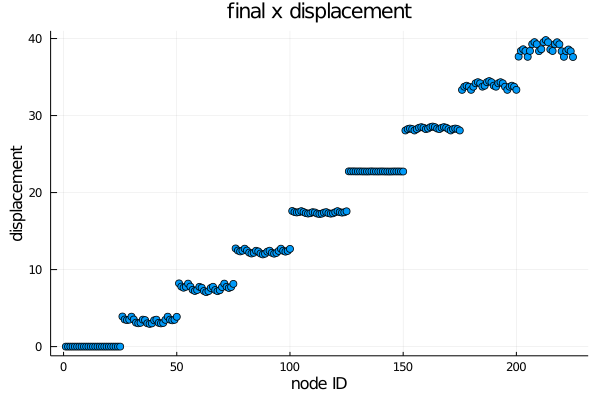

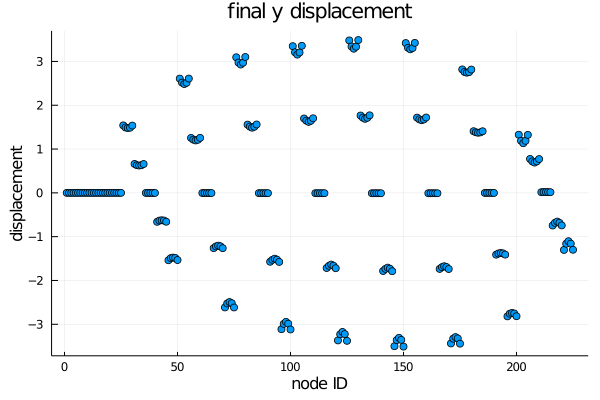

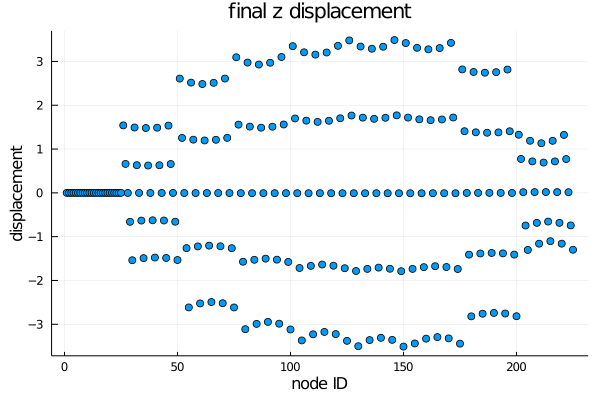

In [206]:
plotFinalDisplacement(name)

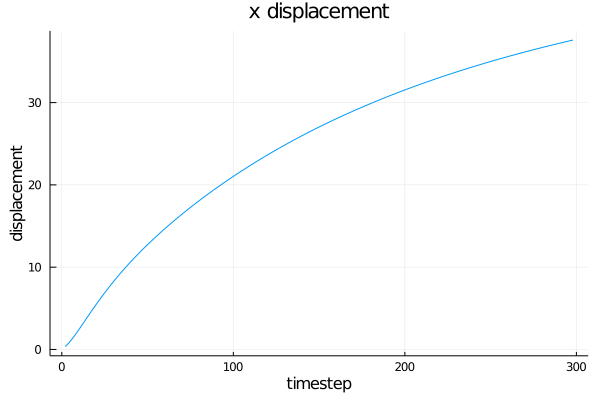

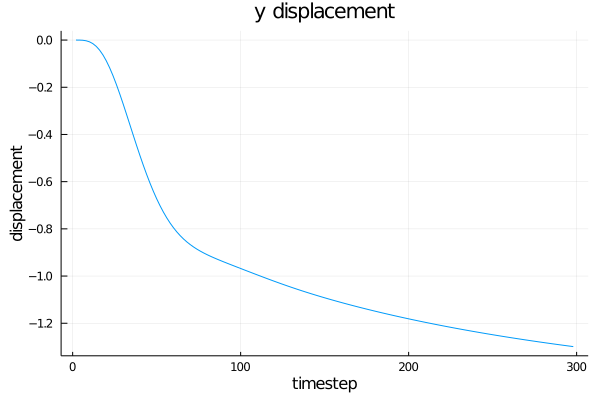

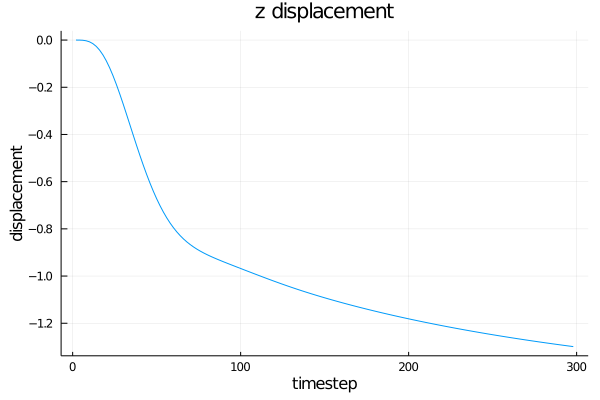

In [207]:
plotDisplacementTroughTimeSteps(name)

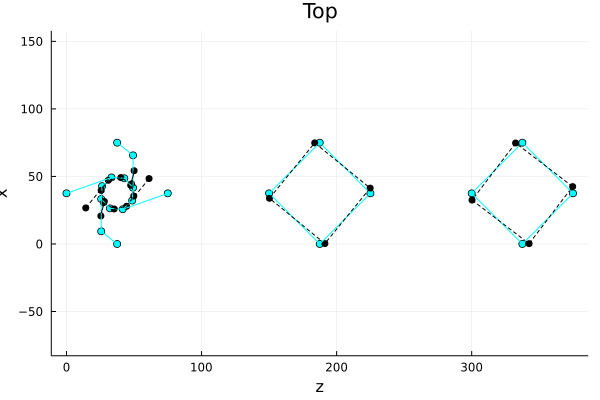

In [122]:
plotTop(simName,70*3,1000,4)  # 3load